In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
vmin = 0
vmax = 0.5


In [3]:
#change sf to location of your country shapefile
sf = "SHP/provinces.shp"

# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"

world = gpd.read_file(sf)
world = world.set_crs(crs=crs)

#this part gets one province/city from the big shapefile we have for Philippines
ct = gpd.read_file(sf)
ct = ct.reset_index()
mnl_shp = ct[ct['PROVINCE'].str.contains("Metropolitan Manila")]
mnl_shp = mnl_shp.set_crs(crs=crs)

In [33]:
fp = r'Metro_Manila_AOD_0317_0515_2019'
#opening csv file with filename fp
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2019 = df

fp = r'Metro_Manila_AOD_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2020 = df

fp = r'Metro_Manila_AOD_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df = df.set_crs(crs=crs)
df_2021 = df

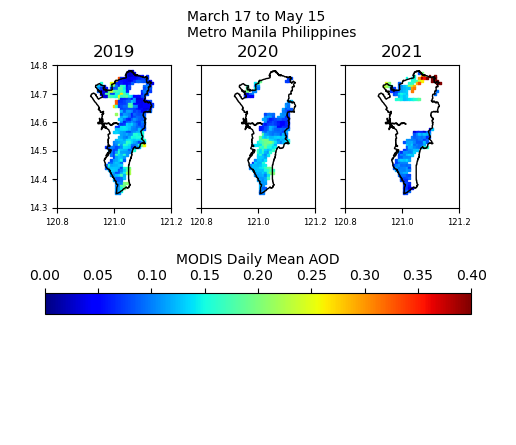

In [34]:
vmax=0.4 #maximum AOD value for legend/scale
#set of coordinates min and max
xl = 120.8 #longitude min
xu = 121.2 #longitude max
yl = 14.3 #latitude min
yu = 14.8 #latitude max

markersize = 2
#fig, ax = plt.subplots()
fig = plt.figure()
gs = fig.add_gridspec(2, 3,hspace=0.6,wspace=-0.31)
ax= fig.add_subplot(gs[0,0])
df_2019.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

mnl_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
plt.ylim(yl, yu)
plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0,1])
df_2020.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)
#cax = fig.add_axes([0.6, 0.6, 0.25, 0.03])
#cb = fig.colorbar(cbar, ax=cax, orientation='horizontal')
#fig.colorbar(cbar, ax=ax, orientation="horizontal",  pad=0.1, label=r'Daily Mean NO2 (molecules cm-2) 1e-16',)
mnl_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
plt.ylim(yl, yu)
plt.xlim(xl, xu)
plt.text(120.75, 14.9, 'March 17 to May 15 \nMetro Manila Philippines', fontsize=10)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0,2])
df_2021.plot(ax=ax,  markersize=markersize, marker = 's', column='val', cmap='jet',vmin=vmin,vmax=vmax, legend=False)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

mnl_shp.to_crs(df.crs).plot(ax=ax, color='None', edgecolor='black')
plt.ylim(yl, yu)
plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:3])
ax.axis('off')
fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top', label=r'MODIS Daily Mean AOD',)


#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'MODIS_AOD_2019_2021.jpg', dpi=300,  facecolor='white', bbox_inches="tight")